Identify the key factors that contribute to increased Medical Readmission rates.


In [3]:
# Import libraries
import pandas as pd
from pandas import DataFrame
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [4]:
# Read the content from CSV to load the dataset and sets the index for the data and eliminating th first column
df = pd.read_csv("D:\D206\MedicalRaw\medical_raw_data.csv")
df = df.drop(columns = 'Unnamed: 0')

In [5]:
# Shows the total size of the dataset, 10k rows and 54 variables
df.shape

(10000, 52)

In [6]:
# Shows the first five rows of the dataset
df.head(5)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Admission,Treatment,Visits,Reliability,Options,Hrs_treatment,Staff,Active_listen
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,1885.655137,3716.525786,2,1,3,3,5,3,4,3


In [7]:
df['index'] = pd.Series(range(0,10000))

In [8]:
# Checking the data, first and last five rows are shown
df.info

<bound method DataFrame.info of       CaseOrder Customer_id                           Interaction  \
0             1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1             2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2             3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3             4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4             5     C544523  5885f56b-d6da-43a3-8760-83583af94266   
...         ...         ...                                   ...   
9995       9996     B863060  a25b594d-0328-486f-a9b9-0567eb0f9723   
9996       9997     P712040  70711574-f7b1-4a17-b15f-48c54564b70f   
9997       9998     R778890  1d79569d-8e0f-4180-a207-d67ee4527d26   
9998       9999     E344109  f5a68e69-2a60-409b-a92f-ac0847b27db0   
9999      10000     I569847  bc482c02-f8c9-4423-99de-3db5e62a18d5   

                                   UID          City State        County  \
0     3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL     

In [9]:
# Re-expression of Education variable as numeric
df['Education_numeric'] = df['Education']

In [10]:
# Re-expression dictionary for Education_numeric variable after re-expression
dict_edu = {"Education_numeric": {"No Schooling Completed": 0, "Nursery School to 8th Grade": 8, "9th Grade to 12th Grade, No Diploma":11, "Regular High School Diploma": 12, "GED or Alternative Credential": 12, "Some College, 1 or More Years, No Degree": 13, "Some College, Less than 1 Year": 13, "Associate's Degree": 14, "Bachelor's Degree": 16, "Professional School Degree": 17, "Master's Degree": 18, "Doctorate Degree": 20}}
df.replace(dict_edu, inplace=True)

In [11]:
# checks the varialbles and expands them completely
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

In [12]:
# Shows datatypes of all the variables in the dataset including the Education_numeric
df.dtypes

CaseOrder               int64
Customer_id            object
Interaction            object
UID                    object
City                   object
State                  object
County                 object
Zip                     int64
Lat                   float64
Lng                   float64
Population              int64
Area                   object
Timezone               object
Job                    object
Children              float64
Age                   float64
Education              object
Employment             object
Income                float64
Marital                object
Gender                 object
ReAdmis                object
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
VitD_supp               int64
Soft_drink             object
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight            float64
Arthritis              object
Diabetes  

In [13]:
# Simple Statistics tool
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Overweight,Anxiety,Initial_days,TotalCharge,Additional_charges,Admission,Treatment,Visits,Reliability,Options,Hrs_treatment,Staff,Active_listen,index,Education_numeric
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,7412.000000,7586.000000,7536.000000,10000.000000,10000.000000,10000.000000,10000.000000,9018.000000,9016.000000,8944.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.098219,53.295676,40484.438268,19.412675,5.012200,1.001400,0.398900,0.709137,0.322316,34.432082,5891.538261,12934.528586,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700,4999.50000,13.197800
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.155427,20.659182,28664.861050,6.723277,1.045734,1.008117,0.628505,0.454186,0.467389,26.287050,3377.558136,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312,2886.89568,2.895292
min,1.00000,610.000000,17.967190,-174.209690,0.000000,0.000000,18.000000,154.080000,9.519012,1.000000,0.000000,0.000000,0.000000,0.000000,1.001981,1256.751699,3125.702716,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,35.000000,19450.792500,16.513171,4.000000,0.000000,0.000000,0.000000,0.000000,7.911709,3253.239465,7986.487642,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2499.75000,12.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33942.280000,18.080560,5.000000,1.000000,0.000000,1.000000,0.000000,34.446941,5852.250564,11573.979365,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,4999.50000,13.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54075.235000,19.789740,6.000000,2.000000,1.000000,1.000000,1.000000,61.124654,7614.989701,15626.491032,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,7499.25000,16.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.130000,53.019124,9.000000,7.000000,5.000000,1.000000,1.000000,71.981486,21524.224210,30566.073130,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000,9999.00000,20.000000


In [14]:
# check for columns with missing/null values in the dataset
df.columns[df.isnull().any()]

Index(['Children', 'Age', 'Income', 'Soft_drink', 'Overweight', 'Anxiety',
       'Initial_days'],
      dtype='object')

In [15]:
# check for rows with missing/null values in the dataset
df.isnull().all(axis=1).any()

False

In [16]:
# Cleanup the columns that have null values
null_columns = df[['Children', 'Age', 'Income', 'Soft_drink', 'Overweight', 'Anxiety',
       'Initial_days']]
null_columns

,Children,Age,Income,Soft_drink,Overweight,Anxiety,Initial_days
0,1.0,53.0,86575.93,NaN,0.0,1.0,10.585770
1,3.0,51.0,46805.99,No,1.0,NaN,15.129562
2,3.0,53.0,14370.14,No,1.0,NaN,4.772177
3,0.0,78.0,39741.49,No,0.0,NaN,1.714879
4,NaN,22.0,1209.56,Yes,0.0,0.0,1.254807
...,...,...,...,...,...,...,...
9995,NaN,25.0,45967.61,No,NaN,1.0,51.561217
9996,4.0,87.0,14983.02,No,1.0,0.0,68.668237
9997,3.0,NaN,65917.81,Yes,1.0,1.0,NaN
9998,3.0,43.0,29702.32,No,1.0,0.0,63.356903


In [17]:
# fill in numeric variables with NA/NAN null data with measure of central tendency , Soft_drink Variable is an object
df = df.fillna(df.median())
df[['Children', 'Age', 'Income', 'Overweight', 'Anxiety', 'Initial_days']].head(10)

,Children,Age,Income,Overweight,Anxiety,Initial_days
0,1.0,53.0,86575.93,0.0,1.0,10.585770
1,3.0,51.0,46805.99,1.0,0.0,15.129562
2,3.0,53.0,14370.14,1.0,0.0,4.772177
3,0.0,78.0,39741.49,0.0,0.0,1.714879
4,1.0,22.0,1209.56,0.0,0.0,1.254807
5,1.0,76.0,33942.28,1.0,0.0,5.957250
6,0.0,50.0,10456.05,1.0,1.0,9.058210
7,7.0,40.0,33942.28,1.0,0.0,34.446941
8,1.0,48.0,55586.48,1.0,0.0,6.180339
9,2.0,78.0,38965.22,1.0,0.0,1.632554


<AxesSubplot:ylabel='Frequency'>

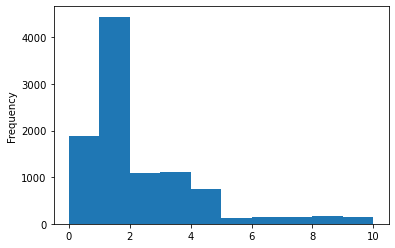

In [18]:
# check again on any other columns that have not been cleaned
df['Children'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

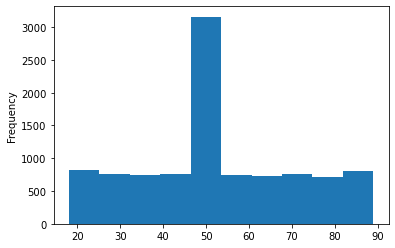

In [19]:
df['Age'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

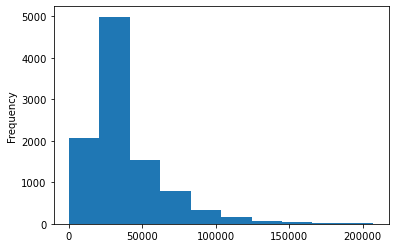

In [20]:
df['Income'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

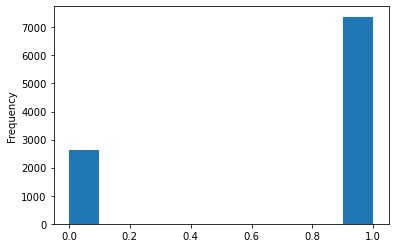

In [21]:
df['Overweight'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

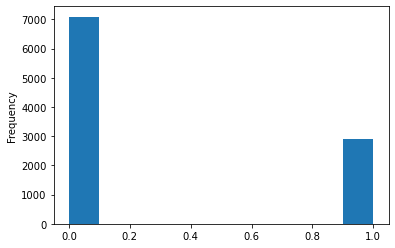

In [22]:
df['Anxiety'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

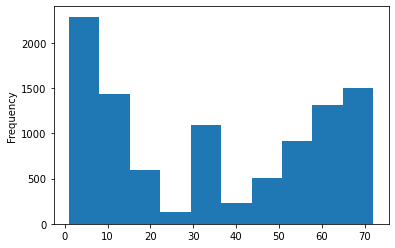

In [23]:
df['Initial_days'].plot(kind='hist')

In [24]:
#Checks the info for data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 54 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  Timezone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  float64
 15  Age                 10000 non-null  float64
 16  Educa

In [32]:
df['Initial_days']

0       10.585770
1       15.129562
2        4.772177
3        1.714879
4        1.254807
          ...    
9995    51.561217
9996    68.668237
9997    34.446941
9998    63.356903
9999    70.850592
Name: Initial_days, Length: 10000, dtype: float64

In [25]:
# Check on Null if all removed at this point
df.isnull().sum()

CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children                 0
Age                      0
Education                0
Employment               0
Income                   0
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight               0
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
Anxiety                  0
A

In [26]:
# Categorical Variables are left
df['Soft_drink']

0       NaN
1        No
2        No
3        No
4       Yes
       ... 
9995     No
9996     No
9997    Yes
9998     No
9999     No
Name: Soft_drink, Length: 10000, dtype: object

In [27]:
# Categorical Null values were replaced with mode 
df['Soft_drink'].fillna(df['Soft_drink'].mode(), inplace=True)

In [28]:
df['Soft_drink']

0        No
1        No
2        No
3        No
4       Yes
       ... 
9995     No
9996     No
9997    Yes
9998     No
9999     No
Name: Soft_drink, Length: 10000, dtype: object

In [29]:
df.to_csv('D:\D206\MedicalRaw\mrva_clean1_df_data.csv')

In [35]:
# Z_Scores of Variables identified with Ourliers
df['Z_Score_Children'] = stats.zscore(df['Children'])
df['Z_Score_Income'] = stats.zscore(df['Income'])

In [36]:
# Z_Scores of Variables with Outliers output
df[['Children', 'Z_Score_Children', 'Income', 'Z_Score_Income']].head()

,Children,Z_Score_Children,Income,Z_Score_Income
0,1.0,-0.424650,86575.93,1.904974
1,3.0,0.618716,46805.99,0.316815
2,3.0,0.618716,14370.14,-0.978466
3,0.0,-0.946333,39741.49,0.034704
4,1.0,-0.424650,1209.56,-1.504016


In [37]:
# checking for outliers
df_outliers = df.query('Z_Score_Income > 3 | Z_Score_Income < -3') 
df_outliers

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Admission,Treatment,Visits,Reliability,Options,Hrs_treatment,Staff,Active_listen,index,Education_numeric,Z_Score_Children,Z_Score_Age,Z_Score_Income
30,31,D54890,81693046-dc24-4c84-8d60-dac8a9271438,342d672cea7e6882f63e8fb3e0076cb1,Niotaze,KS,Chautauqua,67355,37.03392,-96.00933,160,Rural,America/Chicago,Police officer,0.0,53.0,Master's Degree,Full Time,167105.10,Separated,Female,No,17.933415,6,0,1,No,Emergency Admission,Yes,No,Medium,1.0,No,No,No,No,0.0,No,No,No,Intravenous,12.405325,3500.077993,13907.967640,3,2,5,3,3,3,3,5,30,18,-0.946333,-0.012466,5.120796
36,37,X589810,71d5c53b-382f-4bfb-ba89-a5cc8f79b09a,9c7c5a7430801f7e9c6af38d7ba79fd2,Waban,MA,Middlesex,2468,42.32731,-71.23076,5688,Suburban,America/New_York,"Designer, television/film set",1.0,53.0,Bachelor's Degree,Full Time,122615.82,Divorced,Female,No,17.636279,5,1,0,Yes,Observation Admission,No,No,Low,0.0,No,No,No,No,1.0,Yes,No,No,Blood Work,3.549060,2040.063839,4204.826360,4,4,5,5,1,3,5,5,36,16,-0.424650,-0.012466,3.344178
58,59,H786242,d0ee6d98-4a9c-4898-a53a-20ee31b4d641,1b18c3313b8d62a4a4487ca693eb4926,Lynn Haven,FL,Bay,32444,30.23936,-85.65202,21730,Rural,America/Chicago,Prison officer,1.0,86.0,"Some College, Less than 1 Year",Part Time,132963.95,Never Married,Male,No,19.237322,5,0,1,NaN,Elective Admission,No,Yes,Medium,1.0,Yes,No,Yes,No,0.0,Yes,No,No,CT Scan,8.298685,3000.453048,14397.946210,3,3,3,4,4,5,4,4,58,13,-0.424650,1.821589,3.757416
63,64,R430894,7cdcd202-f475-4bbc-8ce2-eef9eb1a38eb,a624688f58099e7d62202790b73110b0,West Bloomfield,MI,Oakland,48322,42.54215,-83.38137,32681,Suburban,America/Detroit,Agricultural engineer,1.0,63.0,GED or Alternative Credential,Full Time,128855.39,Widowed,Female,No,16.400660,5,1,3,NaN,Emergency Admission,No,No,Medium,1.0,No,No,No,Yes,1.0,No,Yes,No,Blood Work,34.446941,4344.037653,11058.380500,4,5,4,5,3,4,4,2,63,12,-0.424650,0.543308,3.593346
77,78,G903269,28275f93-aa0c-4311-ac14-2637d45023cf,2d1201d5070a453860cf425de074ccb8,Cynthiana,IN,Posey,47612,38.19303,-87.69924,737,Suburban,America/Chicago,Translator,1.0,20.0,"Some College, Less than 1 Year",Student,135288.23,Never Married,Female,No,21.208055,5,1,2,No,Observation Admission,No,No,High,0.0,Yes,No,No,No,0.0,No,No,Yes,Intravenous,34.446941,2990.757269,3968.532959,4,4,4,3,5,4,2,4,77,13,-0.424650,-1.846521,3.850233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9742,9743,M714824,91573992-4e09-444a-abfa-1fa92f5fb187,eaa46570bf4ec55c7652c48c4982b0c3,Asbury,WV,Greenbrier,24916,37.83127,-80.57465,743,Suburban,America/New_York,Insurance claims handler,0.0,55.0,Regular High School Diploma,Part Time,153662.04,Divorced,Female,No,16.441892,5,0,0,No,Emergency Admission,No,No,Medium,1.0,No,Yes,Yes,No,0.0,No,No,No,Blood Work,51.354770,7478.015200,9609.241091,3,3,2,3,4,4,4,4,9742,12,-0.946333,0.098689,4.583966
9862,9863,S984639,2f7fda4c-c3b5-4b7b-b0a1-ae51f8149f2e,f2a735c2db8d0c5c824c77dfd94e59fb,Pittsburgh,PA,Allegheny,15260,40.44329,-79.95296,0,Rural,America/New_York,Advertising account planner,4.0,52.0,Doctorate Degree,Full Time,121276.57,Widowed,Female,No,17.044389,5,2,1,NaN,Emergency Admission,No,No,Medium,1.0,Yes,No,No,No,0.0,No,Yes,No,Intravenous,51.491817,6806.584156,9175.406982,5,4,3,4,3,4,5,4,9862,20,1.140399,-0.068043,3.290696
9906,9907,E416766,be658e42-e0d5-45ed-a259-4943a4e3c808,8ae790d973df20db7ac404159105c640,Honolulu,HI,Honolulu,96814,21.29398,-157.84692,19527,Rural,Pa

In [39]:
# PCA Analysis on numeric data variables
df = df[['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Overweight', 'Anxiety', 'Initial_days', 'TotalCharge', 'Additional_charges', 'Education_numeric']]

In [40]:
# Normalize the data set df
df_normalize = (df-df.mean())/df.std()
df_normalize.head()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Overweight,Anxiety,Initial_days,TotalCharge,Additional_charges,Education_numeric
0,-1.731791,-0.529252,-0.814627,0.297120,-0.473145,-0.424629,-0.012465,1.904878,-0.239518,-1.676946,1.562342,-0.959278,-0.799539,0.764967,-0.068318
1,-1.731445,-0.644834,-1.463232,0.395502,0.090237,0.618685,-0.123615,0.316799,-0.062177,0.596263,-0.640001,-0.776505,-0.496404,0.715078,-0.068318
2,-1.731098,0.253032,0.886921,-0.354771,0.482959,0.618685,-0.012465,-0.978418,-0.296996,0.596263,-0.640001,-1.193129,-1.099597,0.698600,-0.068318
3,-1.730752,0.215244,0.952482,-0.149396,-0.526366,-0.946285,1.376900,0.034702,-0.296373,-1.676946,-0.640001,-1.316109,-1.014466,0.009004,-0.413706
4,-1.730405,-0.982116,-0.213241,0.943937,-0.315570,-0.424629,-1.735279,-1.503941,-0.378112,-1.676946,-0.640001,-1.334615,-1.186029,-1.408920,-0.413706


In [45]:
# PCA Calculation
pca = PCA(n_components=df.shape[1])
pca.fit(df_normalize)
df_pca2 = pd.DataFrame(pca.transform(df_normalize),
columns = ['PC1', 'PC2', 'PC3,', 'PC4', 'PC5', 'PC6','PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15'])

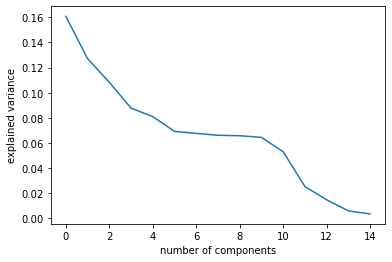

In [47]:
# Scree Plot of variance
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

In [49]:
# Calculate covariance and vectors
cov_matrix = np.dot(df_normalize.T, df_normalize) / df.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

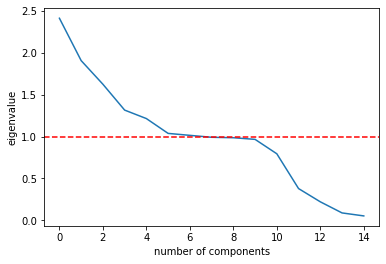

In [56]:
# Eigenvalues and Eivenvectors - Based on the Kaiser Rule or Kaiser Criterion, we only keep PCs > 1 
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.axhline(y=1, color='red', linestyle='--') #adds horizontal line to highlight PCs to keep based on Kaiser rule
plt.show()

In [51]:
# PCA loadings - to  understand how much each variable/feature contributes to PCA
# From this information we can reduce the number of variables based on correlation value weights
loadings = pd.DataFrame(pca.components_.T,
columns = ['PC1', 'PC2', 'PC3,', 'PC4', 'PC5', 'PC6','PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15'],
index=df_normalize.columns)
loadings

,PC1,PC2,"PC3,",PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
CaseOrder,0.521547,-0.006211,-0.061842,-0.401053,-0.045699,-0.002197,-0.003809,0.017955,-0.005325,0.009809,-0.008633,0.041204,-0.743557,-0.016368,0.076232
Zip,0.028554,0.701426,0.029479,0.012168,0.057706,-0.002544,-0.002331,0.005850,0.010212,-0.022964,-0.116756,-0.001755,0.020808,-0.698107,0.027205
Lat,-0.014441,0.058041,-0.004275,0.045919,-0.705188,-0.022152,0.041679,-0.049943,0.038012,0.007225,0.690798,-0.015674,0.000820,-0.115428,0.003739
Lng,-0.028836,-0.706024,-0.025879,-0.024449,0.031500,0.003559,0.000609,0.001619,-0.013355,0.015398,-0.024621,0.006693,0.018536,-0.704395,0.029013
Population,0.020692,0.035241,-0.019848,-0.041851,0.689632,0.049959,-0.105617,-0.000557,-0.045411,-0.007955,0.709723,-0.014553,-0.011762,-0.027549,0.000187
Children,0.001896,0.014700,0.012707,-0.006735,0.018834,0.478435,0.238168,-0.748985,-0.200863,0.333583,-0.027514,-0.008587,-0.012536,-0.001715,-0.001579
Age,0.023350,-0.032012,0.701724,-0.073013,0.003995,-0.003410,0.007520,0.004018,0.018513,-0.027379,-0.000644,-0.705259,-0.043516,-0.001300,-0.014274
Income,-0.009730,0.009527,-0.005146,0.020172,0.059436,0.274003,0.648486,0.492222,0.282918,0.419382,0.043102,-0.007463,-0.010633,-0.001987,-0.000133
VitD_levels,0.300749,-0.034836,0.058428,0.753655,0.044778,-0.038428,0.011344,-0.033154,0.022788,-0.006573,-0.000945,-0.009301,-0.147644,0.014441,0.556381
Overweight,-0.016306,0.022206,0.007332,-0.010009,0.021760,-0.652527,0.030345,-0.013318,-0.385210,0.650058,0.010342,-0.025203,0.003027,-0.002902,-0.001308
